In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from konlpy.tag import Mecab

import numpy as np
from collections import Counter
import re
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_excel("fire_data.xlsx")
df

,연번,기준연월,발생형태_소,재해개요
0,43,201212,화재,주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
1,120,201212,폭발·파열,[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파...
2,197,201212,폭발·파열,[비보고 사유] 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 [조...
3,394,201212,폭발·파열,[비보고 사유] 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 ...
4,478,201212,폭발·파열,[비보고 사유] 공상처리 [조사자 견해] 유성기업(주)에서 제출한 공상처리 내역 및...
...,...,...,...,...
1814,495010,201712,화재,상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생.(신나에 불이 옮겨...
1815,495567,201712,화재,12월 07일 오전07시경 제품(무거리) 보관용기로 사용하기 위해 폐드럼통 뚜껑 산...
1816,495930,201712,폭발·파열,2017년 12월 12일 14시 48분경 회사 공장동에서 기계시운전을 하면서 온도상...
1817,496127,201712,화재,2017년 12월 18일 13시경 부산시 강서구 송정동 소재 부광화학공업(주) 본공...


In [3]:
# 불용어 정의
stopwords = pd.read_excel("stopwords.xlsx")
stopwords = stopwords["불용어"]
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in df['재해개요']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


재해개요의 최대 길이 : 263
재해개요의 평균 길이 : 57.391973611874654


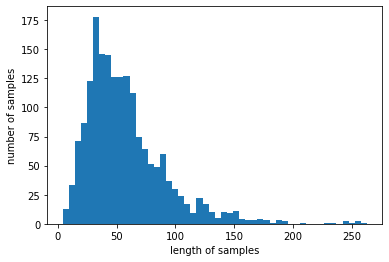

In [4]:
# 리뷰 길이 분포 확인
print('재해개요의 최대 길이 :',max(len(outline) for outline in tokenized_data))
print('재해개요의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(outline) for outline in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [5]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 1)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape
# 총 1728 개의 단어 존재하며 100차원으로 이루어짐


(2050, 100)

In [31]:
# target과 가장 유사한 단어 뽑기 
target = "화재"
print(model.wv.most_similar(target))

[('발생', 0.9944780468940735), ('인하다', 0.9863859415054321), ('가', 0.9851335883140564), ('폭발', 0.9751871824264526), ('스파크', 0.9681646227836609), ('상해', 0.9558282494544983), ('의하다', 0.9525913596153259), ('되다', 0.9504022598266602), ('로', 0.9491285085678101), ('만나다', 0.9490975141525269)]


In [35]:
vectors = []
for i, word in enumerate(df["재해개요"]):
    if word in model:
        vectors.append(model[word])
    else:
        del words[i]

similarity = cosine_similarity(vectors, vectors)
print(similarity.shape) #(11, 11)

TypeError: argument of type 'Word2Vec' is not iterable

In [75]:
api = KhaiiiApi()
sentence_list = []
morphs_list = []

df_stopwords = pd.read_excel('stopwords.xlsx')
stopwords = list(df_stopwords['불용어'])


for sentence in df["재해개요"]:
    if sentence != '':
        # 모든 문장
        if '.' in sentence:
            sentence_detail = sentence.split('. ')
            for i in sentence_detail:
                if i != '':
                    sentence_list.append(i)
        else:
            sentence_list.append(sentence)

for s in sentence_list:
    print(s)
    print()

주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징 기계를 이용하여 작업하던 중 가우징 불똥이 내경 단차부위에 두딪혀 작업자 쪽으로 뛰어 점퍼에 불이 붙었으나 방독마스크와 용접면을 쓰고 있어서 불이 붙은 줄 모르다가 늦게 인지하여 왼쪽팔과 가슴쪽에 화염화상을 입음

비보고 사유 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파편에 복부를 강타하여 부상을 입고 병원 치료를 하여 국민건강보험공단으로부터 부당이득금 환수조치된 건임 조사자 견해 법규정을 몰랐고 사고가 경미하여 산업재해조사표를 제출하지 않은 건으로 최근 년이내 산재발생미보고로 처분 받은 사실이 없으므로 경고조치 후 종결코자 합니다  붙임 산재발생미보고 경위서 및 산업재해조사표 작업장소 사업장 내 가수주입실 작업목적 가스주입 후 이동대기 중 작업도구 가스주입기 작업내용 이송대기 적재중에 재해사유 체결부위 미세불량으로 재해발생 체결이 분리되면서 파편이 복부강타

비보고 사유 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 조사자 견해 경고 조치를 하고자 함 작업장소 상기 사업장 내에서 작업목적 불을 피우기 위하여 작업도구 락카통을 사용하여 작업내용 부주의로 재해사유 없음 재해발생 락카통이 폭발하여 얼굴에 화상을 입음

비보고 사유 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 것으로 담당자가 산재처리 절차에 미숙하여 건강보험공단 환수처리로 마무리된 것으로 오인함 조사자 견해 재해정도가 경미하고 사업주의 고의성이 없는 것으로 판단하여 경고 조치후 종결하고자 합니다 작업장소 작업장내에서 작업목적 휴식중 추위를 피하기 위해 작업도구 불을 피우기 위해 작업내용 스레기 등을 모아 재해사유 불을 붙였다가 재해발생 더미속에 섞인 락카가 폭발하면서 목에 화상을 입음

비보고 사유 공상처리 조사자 견해 유성기업주에서 제출한 공상처리 내역 및 산업재해조사표 확인 결과 업무상 재해임이 명백함에도 공상처리 후 보고기한 내에 이를 미보고하여 과태

년 월 일 시 분경 경기도 안성시 양성면 방축리 산  공장창고에서 마지막 물건을 정리하고 지저분한거 소각하다가 옷에 불이 붙어 좌측팔 얼굴 몸통 양측손에 화상을 입어 안성 성모병원경유하여 구로성심병원 입원하였습니다

사업장에서 분산기을 세척한 후 나온 폐 페인트세척용제리터 캔를 폐페인트 보관 드럼에 투입하는 작업 중 정전기로 인해 폐페인트 보관 드럼과 연결된 호퍼깔대기에 담겨져 있던 폐페이트에 화재가 발생하여 작업중이던 재해자가 화상을 입는 사고가 발생하였음화재 발생 직후 소화기를 이용하여 곧바로 화재 진압을 하였고화상을 입은 작업자를 공장 근처에 있는 진영삼성병원으로 후송하였음

 경 경기도 화성시 장안면 수정로번길  소재 신원 제사골 라인 재해자가 신규설치한 사골 추출탱크 시운전 중 탱크상부의 고정 클램프가 내부압력을 이기지 못하고 용접부위가 벌어지면서 고압스팀 및 고온의 사골액이 분출되면서 화상을 입고  구급대에 의해 병원으로 후송되어 중환자실에서 치료하던 중  경 사망함

년 월 일 분경 규림금속 열처리 현장에서 사고당사자인 신정희는 가열로 호기에 냉각유를 주입중 가열로 호기가 폭발하는 사고가 발생하여 현장에 함께있던 직원의 차로 인근 병원 병원 응급실으로 이동 응급처치후 응급차를 이용하여 현재 입원중인 베스티안부천병원으로 이동하였습니다

회사내에서 사출작업하는 도중기계  한 의 작업이 끝나고 금형을 바꾸고 작업에 맞는 재료를 넣어서 닦아 내던 도중 약간의 착오로 금형에 뿌리는 이형제깡통이 터지는 바람에 눈에 바로 맞아서 출혈과 보이지 않는 현상으로 병원으로 내원하게 되었습니다 사출기계 특성상 뒤에서 사출되는 재료의 온도가 도 정도 되는데 이 온도를 생각 못해서 착오 이형제 통에 재료가 감기는 바람에 이형제통의 온도가 상승 팽창되어 폭발한것 같습니다  진해소재 맑은눈 안과 통원치료함

년 월 일  마그네슘 주조 작업을 위해서  가스 토치기를 이용하여 모터 브라켓트를 예열하는 과정에서 옆에 보관된 마그네슘 산화물에 불이 옮겨 붙으면서 화염이 발생하여 화상

In [76]:
posts = df.get("재해개요")
posts

0       주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
1       비보고 사유 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파편에...
2       비보고 사유 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 조사자 ...
3       비보고 사유 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 것으...
4       비보고 사유 공상처리 조사자 견해 유성기업주에서 제출한 공상처리 내역 및 산업재해조...
                              ...                        
1814    상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생신나에 불이 옮겨붙으...
1815    월 일 오전시경 제품무거리 보관용기로 사용하기 위해 폐드럼통 뚜껑 산소절단 작업중 ...
1816    년 월 일 시 분경 회사 공장동에서 기계시운전을 하면서 온도상승시키는데 기계폭발하여...
1817    년 월 일 시경 부산시 강서구 송정동 소재 부광화학공업주 본공장 조합실에서 도료 제...
1818    년 월 일 시경 부산시 강서구 송정동 소재 부광화학공업주 본공장 조합실에서 도료 제...
Name: 재해개요, Length: 1819, dtype: object

In [81]:
def tokenizer(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(df_stopwords.get("불용어"))):
    morphs_list = []
    sentence_nouns_list = []


    # 모든 문장에서 명사만 추출
    for sentence in sentence_list:
        morphs_value = []
        for word in api.analyze(sentence):
            for morph in word.morphs:
                if morph.tag == 'NNG' and morph.lex not in df_stopwords: # 명사 추출, 불용어 제거
                    morphs_list.append(morph.lex)
                    morphs_value.append(morph.lex)
        sentence_nouns_list.append(morphs_value) # 각 문장별 명사 리스트 구별
    return morphs_list

print(posts.iloc[0])
print(tokenizer(posts.iloc[-1]))

주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징 기계를 이용하여 작업하던 중 가우징 불똥이 내경 단차부위에 두딪혀 작업자 쪽으로 뛰어 점퍼에 불이 붙었으나 방독마스크와 용접면을 쓰고 있어서 불이 붙은 줄 모르다가 늦게 인지하여 왼쪽팔과 가슴쪽에 화염화상을 입음
['주조', '사업', '장', '가우징', '작업장', '안쪽', '소착', '제거', '징', '기계', '이용', '작업', '가', '징', '불똥', '내경', '단차부위', '작업자', '점퍼', '불', '방독마스크', '용접면', '불', '인지', '왼쪽팔', '가슴', '화염', '화상', '입음', '사유', '가스주입실', '이송', '대기', '질소가스통', '체결', '부위', '불량', '폭발', '파편', '복부', '강타', '부상', '병원', '치료', '국민', '건강', '보험', '공단', '부당', '이득금', '환수', '조치', '건임', '조사자', '견해', '법', '규정', '사고', '경미', '산업', '재해조사표', '제출', '최근', '산재', '발생미보고', '처분', '사실', '경고', '조치', '후', '종결', '코자', '산재', '발생미', '경위서', '산업', '재해', '조사표', '작업', '장소', '사업장', '가수', '주입실', '작업', '목', '가스주입', '후', '이동', '대기', '작업', '도구', '가스주입기', '작업', '내용', '이송대기', '적재', '재해', '사유', '체결', '부위', '미세', '불량', '재해', '발생', '체결', '분리', '파편', '복부', '강타', '사유', '재해', '발생', '산업', '재해발생', '보고', '사실', '조사자', '견해', '경고', '조치', '함', '작업', '장소', '상기', '사업장', '작업', '목', '불', '작업', '도구', '락카통', '사용', '작업', '내용', '

In [89]:
# vectorize = TfidfVectorizer(
#     tokenizer = tokenizer, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
#     min_df = 10,            # 단어가 출현하는 최소 문서의 개수
#     sublinear_tf = True,    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
#     stop_words = list(df_stopwords.get("불용어"))
# )

# X = vectorize.fit_transform(posts)
# pd.DataFrame(X.toarray())
X = pd.read_excel("vector1.xlsx")
X


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,6218,6219,6220,6221,6222,6223,6224,6225,6226,6227
0,0,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
1,1,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
2,2,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
3,3,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
4,4,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1814,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
1815,1815,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
1816,1816,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276
1817,1817,0.006276,0.006276,0.006276,0.013171,0.006276,0.006276,0.006276,0.010626,0.006276,...,0.006276,0.010626,0.006276,0.020727,0.006276,0.017521,0.006276,0.014977,0.006276,0.006276


In [88]:
# pd.DataFrame(X.toarray()).to_excel("vector1.xlsx")

In [ ]:
# 두번째 tokenizer(mecab)
tagger = Mecab()
def tokenizer_2(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words and len(noun)>1:
            nouns.append(noun)
    return nouns

print(posts.iloc[-1])
print(tokenizer_2(posts.iloc[-1]))

In [77]:
morphs_list = []
sentence_nouns_list = []


# 모든 문장에서 명사만 추출
for sentence in sentence_list:
    morphs_value = []
    for word in api.analyze(sentence):
        for morph in word.morphs:
            if morph.tag == 'NNG' and morph.lex not in df_stopwords: # 명사 추출, 불용어 제거
                morphs_list.append(morph.lex)
                morphs_value.append(morph.lex)
    sentence_nouns_list.append(morphs_value) # 각 문장별 명사 리스트 구별
    
morphs_list[0:20]
morphs_value[0:20]

['일',
 '시경',
 '소재',
 '부광',
 '화학',
 '공업주',
 '본공장',
 '조합실',
 '도료',
 '제조',
 '원료',
 '투입',
 '작업',
 '정전기',
 '화재',
 '발생',
 '화기',
 '피부',
 '노출',
 '얼굴']

In [87]:
num_top_nouns = 15
morphs_counter = Counter(morphs_list)
morphs_top_nouns = dict(morphs_counter.most_common(num_top_nouns))
morphs_top_nouns
morphs_counter

Counter({'주조': 22,
         '사업': 29,
         '장': 57,
         '가우징': 2,
         '작업장': 208,
         '안쪽': 9,
         '소착': 2,
         '제거': 121,
         '징': 6,
         '기계': 162,
         '이용': 86,
         '작업': 1534,
         '가': 12,
         '불똥': 36,
         '내경': 1,
         '단차부위': 1,
         '작업자': 132,
         '점퍼': 2,
         '불': 759,
         '방독마스크': 2,
         '용접면': 2,
         '인지': 24,
         '왼쪽팔': 4,
         '가슴': 32,
         '화염': 113,
         '화상': 1051,
         '입음': 291,
         '사유': 50,
         '가스주입실': 1,
         '이송': 107,
         '대기': 14,
         '질소가스통': 1,
         '체결': 15,
         '부위': 119,
         '불량': 19,
         '폭발': 678,
         '파편': 56,
         '복부': 17,
         '강타': 16,
         '부상': 62,
         '병원': 218,
         '치료': 179,
         '국민': 3,
         '건강': 3,
         '보험': 10,
         '공단': 12,
         '부당': 2,
         '이득금': 2,
         '환수': 2,
         '조치': 40,
         '건임': 2,
         '조사자': 23,


In [64]:
word2id = {w:i for i,w in enumerate(morphs_top_nouns.keys())}
id2word = {i:w for i,w in enumerate(morphs_top_nouns.keys())}
print(word2id)
print(id2word)

{'작업': 0, '화상': 1, '발생': 2, '불': 3, '폭발': 4, '화재': 5, '일': 6, '후': 7, '분경': 8, '사고': 9, '재해자': 10, '공장': 11, '시': 12, '입음': 13, '월': 14}
{0: '작업', 1: '화상', 2: '발생', 3: '불', 4: '폭발', 5: '화재', 6: '일', 7: '후', 8: '분경', 9: '사고', 10: '재해자', 11: '공장', 12: '시', 13: '입음', 14: '월'}


In [65]:
adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns),int)
for sentence_nouns in sentence_nouns_list:
    for wi, i in word2id.items():
        if wi in sentence_nouns:
            for wj, j in word2id.items():
                if i != j and wj in sentence_nouns:
                    adjacent_matrix[i][j] += 1
adjacent_matrix

array([[  0, 594, 480, 313, 326, 283, 285, 180, 226, 171, 154, 160, 158,
        162, 147],
       [594,   0, 395, 366, 309, 281, 335, 174, 240, 121, 135, 175, 166,
        261, 166],
       [480, 395,   0, 163, 198, 404, 222, 151, 186, 212, 113, 115, 129,
        112, 119],
       [313, 366, 163,   0,  70,  80, 175, 102, 139,  70,  68,  93,  96,
         84,  96],
       [326, 309, 198,  70,   0,  66, 172, 110, 135, 143,  73,  90,  96,
        105,  88],
       [283, 281, 404,  80,  66,   0, 153,  80, 121,  66,  73,  88,  78,
         80,  81],
       [285, 335, 222, 175, 172, 153,   0, 101, 184,  87,  67,  82, 150,
         96, 228],
       [180, 174, 151, 102, 110,  80, 101,   0, 106,  69,  64,  53,  74,
         43,  56],
       [226, 240, 186, 139, 135, 121, 184, 106,   0,  64,  65,  76, 224,
         60, 109],
       [171, 121, 212,  70, 143,  66,  87,  69,  64,   0,  40,  49,  52,
         21,  45],
       [154, 135, 113,  68,  73,  73,  67,  64,  65,  40,   0,  44,  37,
       

In [66]:
network = nx.from_numpy_matrix(adjacent_matrix)
list(network.adjacency())

[(0,
  {1: {'weight': 594},
   2: {'weight': 480},
   3: {'weight': 313},
   4: {'weight': 326},
   5: {'weight': 283},
   6: {'weight': 285},
   7: {'weight': 180},
   8: {'weight': 226},
   9: {'weight': 171},
   10: {'weight': 154},
   11: {'weight': 160},
   12: {'weight': 158},
   13: {'weight': 162},
   14: {'weight': 147}}),
 (1,
  {0: {'weight': 594},
   2: {'weight': 395},
   3: {'weight': 366},
   4: {'weight': 309},
   5: {'weight': 281},
   6: {'weight': 335},
   7: {'weight': 174},
   8: {'weight': 240},
   9: {'weight': 121},
   10: {'weight': 135},
   11: {'weight': 175},
   12: {'weight': 166},
   13: {'weight': 261},
   14: {'weight': 166}}),
 (2,
  {0: {'weight': 480},
   1: {'weight': 395},
   3: {'weight': 163},
   4: {'weight': 198},
   5: {'weight': 404},
   6: {'weight': 222},
   7: {'weight': 151},
   8: {'weight': 186},
   9: {'weight': 212},
   10: {'weight': 113},
   11: {'weight': 115},
   12: {'weight': 129},
   13: {'weight': 112},
   14: {'weight': 119}})

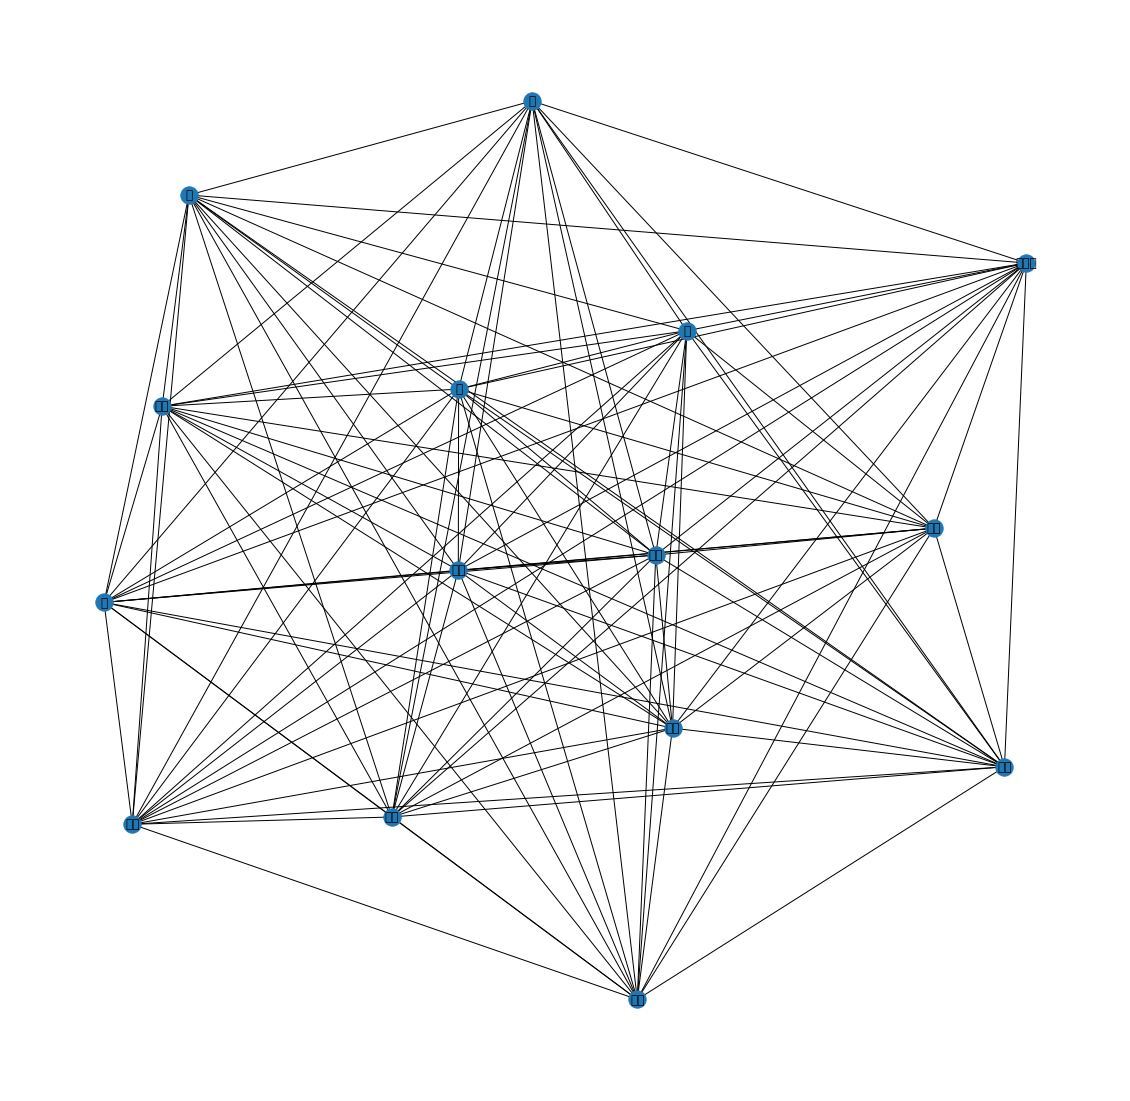

In [67]:
# font_path="./font/NanumBarunGothic.ttf"
# font_name = fm.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}
nx.draw(word_network, labels=id2word, ax=ax)

In [74]:
from matplotlib import cm
# target_cosine_id = sorted_cosine_dic[0:11]
# cosine_result = []
# for target_id,cos_sim in target_cosine_id:
#     tmp = []
#     x = info_df[info_df['ID'] == target_id].index[0]
#     for target_id2,cos_sim2 in target_cosine_id:
#         y = info_df[info_df['ID'] == target_id2].index[0]
#         tmp.append(cosine_similarity(X[x], X[y])[0][0])
#     cosine_result.append(tmp)
# cosine_result_df = pd.DataFrame(cosine_result)

# result_index = []
# for i in target_cosine_id:
#     result_index.append(info_df[info_df["ID"] == i[0]].index[0])
# result_id = []
# for i in sorted_cosine_dic[0:11]:
#     if int(i[0]) == 0:
#         result_id.append("INPUT")
#         continue
#     result_id.append(int(i[0]))
    
network = nx.from_numpy_matrix(adjacent_matrix)
G=nx.Graph()
for i in range(len(adjacent_matrix)):
    for j in range(i+1,len(adjacent_matrix)):
        a = adjacent_matrix[i] # cos_sim a node
        b = adjacent_matrix[j] # cos_sim b node
        w = float(pd.DataFrame(adjacent_matrix).iloc[i].iloc[j]) # score as weighted edge where high scores = low weight
        G.add_weighted_edges_from([(a,b,w)])

def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/((max(arr)-min(arr))+0.1)*(newmax-newmin)+newmin for x in arr]
# use the matplotlib plasma colormap
graph_colormap = cm.get_cmap('plasma', 12)
# node color varies with Degree
c = rescale([G.degree(v) for v in G],0.0,0.9) 
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],5000,7000)
# edge width shows 1-weight to convert cost back to strength of interaction 
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.5,20)
# edge color also shows weight
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]
pos = nx.spring_layout(G)
plt.figure(figsize=(20,20),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='white',font_weight='bold',font_size='18')
plt.axis('off')
# plt.show()
plt.savefig('network_image')

TypeError: unhashable type: 'numpy.ndarray'